In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

/tmp/ipykernel_61/1994989634.py:11: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [4]:
import heapq

def heuristic(a, b):
    # Manhattan distance on a grid
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0

    while frontier:
        current = heapq.heappop(frontier)[1]

        if current == goal:
            break

        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                heapq.heappush(frontier, (priority, next))
                came_from[next] = current

    return came_from, cost_so_far



In [5]:
import heapq

class Node:
    def __init__(self, name, parent, cost, heuristic):
        self.name = name
        self.parent = parent
        self.cost = cost
        self.heuristic = heuristic
        self.f = cost + heuristic
        
    def __lt__(self, other):
        return self.f < other.f
        
    def __str__(self):
        return self.name
    
def a_star(graph, start, goal):
    frontier = []
    heapq.heappush(frontier, Node(start, None, 0, graph[start]['heuristic']))
    visited = set()
    
    while frontier:
        current = heapq.heappop(frontier)
        visited.add(current.name)
        
        if current.name == goal:
            path = []
            while current:
                path.append(current.name)
                current = current.parent
            return path[::-1]
        
        for neighbor, cost in graph[current.name]['neighbors'].items():
            if neighbor not in visited:
                heapq.heappush(frontier, Node(neighbor, current, current.cost + cost, graph[neighbor]['heuristic']))
                
    return None

graph = {
    'A': {'neighbors': {'B': 5, 'D': 2}, 'heuristic': 10},
    'B': {'neighbors': {'E': 2}, 'heuristic': 6},
    'C': {'neighbors': {'F': 3}, 'heuristic': 2},
    'D': {'neighbors': {'B': 1, 'E': 6}, 'heuristic': 8},
    'E': {'neighbors': {'F': 5}, 'heuristic': 3},
    'F': {'neighbors': {}, 'heuristic': 0}
}

start = 'A'
goal = 'F'

print(a_star(graph, start, goal))

['A', 'D', 'B', 'E', 'F']


In [6]:
!pip install python-Levenshtein

  Using cached python_Levenshtein-0.20.9-py3-none-any.whl (9.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 385.2 kB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.4 MB/s eta 0:00:00:00:01


In [6]:
import Levenshtein
import heapq

class Graph:
    def __init__(self):
        self.edges = {}
        self.weights = {}
    def add_edge(self, from_node, to_node, weight):
        # Adding the edge to the edges dict
        if from_node not in self.edges:
            self.edges[from_node] = [to_node]
        else:
            self.edges[from_node].append(to_node)
        # Adding the edge weight to the weights dict
        self.weights[(from_node, to_node)] = weight


def A_Star_Search(graph, start, end):
    # Creating the priority queue
    queue = PriorityQueue()
    queue.put(start, 0)
    # Creating the came_from dict
    came_from = {}
    # Creating the cost_so_far dict
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not queue.empty():
        current = queue.get()
        if current == end:
            break
        for neighbor in graph.edges.get(current, []):
            new_cost = cost_so_far[current] + graph.weights[(current, neighbor)]
            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(end, neighbor)
                queue.put(neighbor, priority)
                came_from[neighbor] = current
    return came_from, cost_so_far


def manhattan_distance(start, end):
    x1, y1 = start
    x2, y2 = end
    return abs(x1 - x2) + abs(y1 - y2)
def levenshtein_distance(start, end):
    import Levenshtein
    return Levenshtein.distance(start, end)
def heuristic(a, b):
    return levenshtein_distance(a,b)


class PriorityQueue:
    def __init__(self):
        self.elements = []
    def empty(self):
        return len(self.elements) == 0
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    def get(self):
        return heapq.heappop(self.elements)[1]

graph = Graph()
edges = [("A", "B", 2), ("A", "C", 3), ("B", "D", 4), ("C", "D", 5), ("C", "E", 1), ("D", "E", 2)]
for edge in edges:
    graph.add_edge(*edge)

came_from, cost_so_far = A_Star_Search(graph, "A", "E")
print("Came from:", came_from)
print("Cost so far:", cost_so_far)

Came from: {'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'C'}
Cost so far: {'A': 0, 'B': 2, 'C': 3, 'D': 6, 'E': 4}


Accuracy: 93.00%


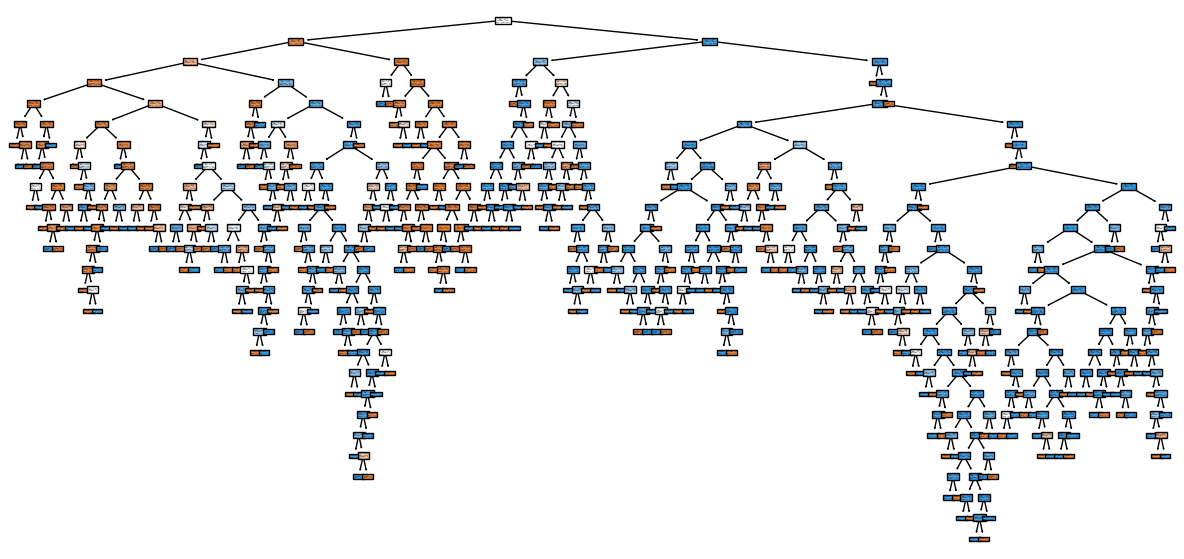

In [8]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# Generate some sample data
X, y = make_classification(n_samples=9999, n_features=17, n_classes=2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Visualize the decision tree
plt.figure(figsize=(15,7))
plot_tree(clf, filled=True)
plt.show()


Accuracy: 93.00%


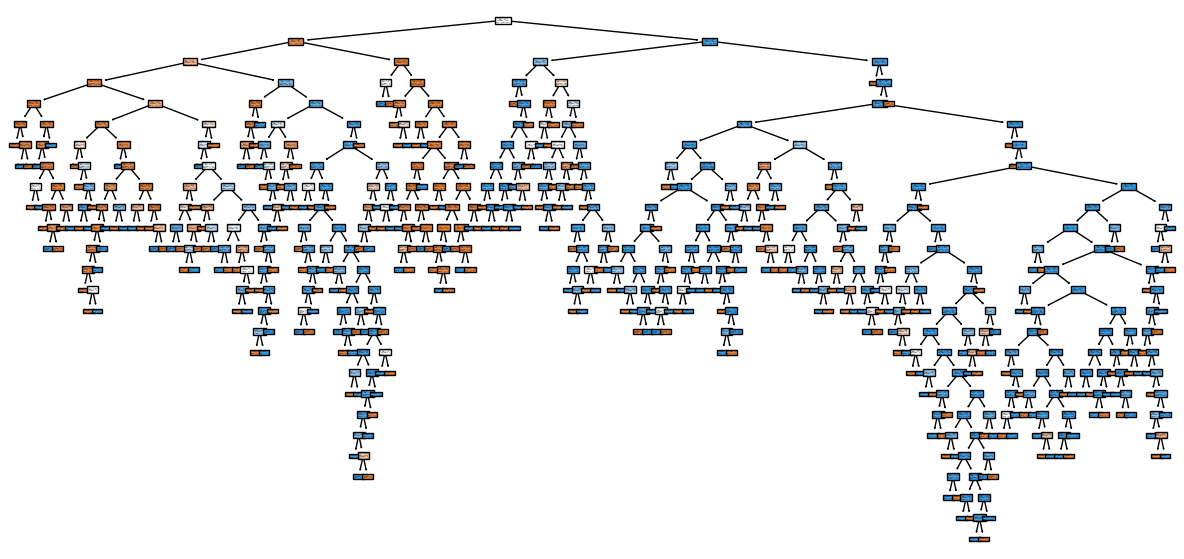

In [8]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

# Generate some sample data
X, y = make_classification(n_samples=9999, n_features=17, n_classes=2)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))

# Visualize the decision tree
plt.figure(figsize=(15,7))
plot_tree(clf, filled=True)
plt.show()
